In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts 

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
import my_library.gluex_style

In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data', filtered=False)

In [4]:
df_pipkmks = df_pipkmks.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.P_P_CUT)

In [10]:
hist_ks_before = df_pipkmks.Histo1D(('ks_before', ';M(#pi^{+}#pi^{-}) [GeV]', 500, 0.25, 0.75), 'ks_m')
hist_pl_vs_ks = df_pipkmks.Histo2D(('pl_vs_ks', 'Pathlength Signifigance vs M(#pi^{+}#pi^{-})', 500, 0.25, 0.75, 100, 0, 10), 'ks_m', 'pathlength_sig')
hist_ks_after = df_pipkmks.Filter(kcuts.KS_PATHLENGTH_CUT).Histo1D(('ks_after', ';M(#pi^{+}#pi^{-}) [GeV]', 500, 0.25, 0.75), 'ks_m')

In [18]:
# TODO: font size
c = ROOT.TCanvas()

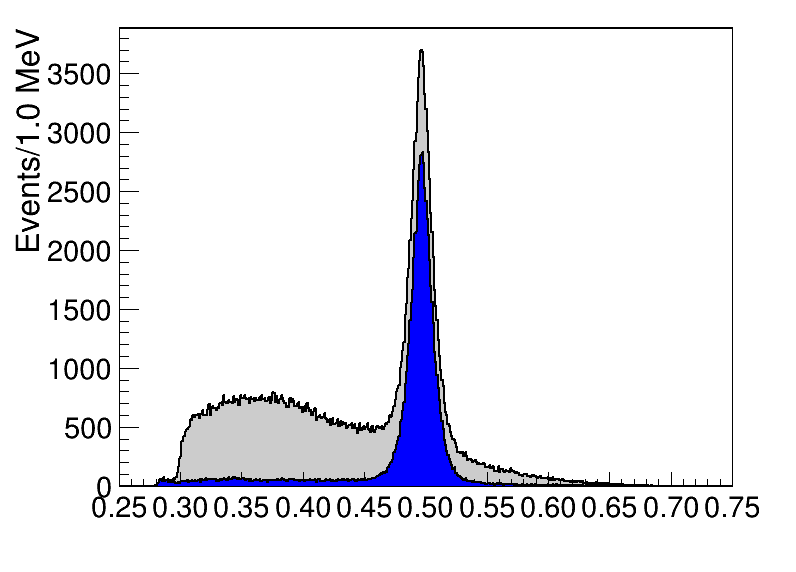

In [19]:
hist_ks_before.GetXaxis().SetTitle('M(#pi^{+}#pi^{-}) [GeV]')
hist_ks_before.GetYaxis().SetTitle(f'Events/{(0.75-0.25)/500*1000} MeV')
hist_ks_before.Draw()
hist_ks_after.SetFillColor(ROOT.kBlue)
hist_ks_after.Draw('same')
c.Draw()

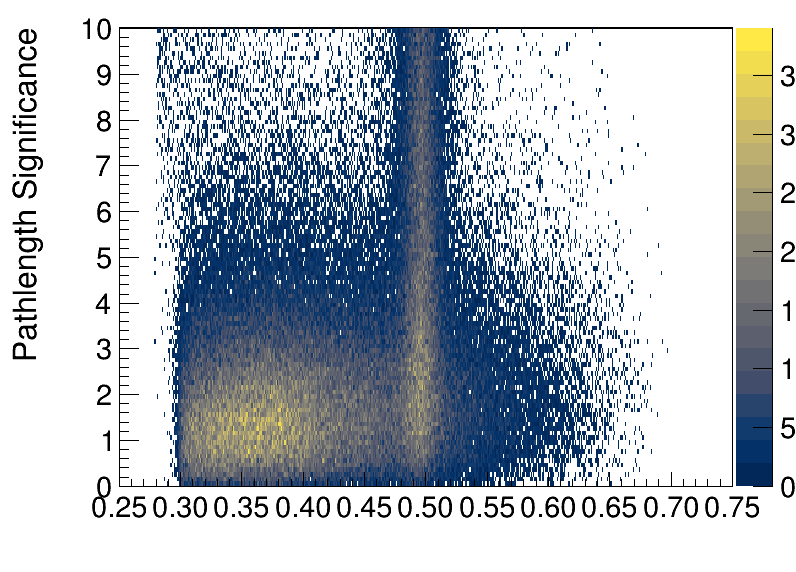

In [20]:
hist_pl_vs_ks.GetXaxis().SetTitle('M(#pi^{+}#pi^{-}) [GeV]')
hist_pl_vs_ks.GetYaxis().SetTitle('Pathlength Significance')
hist_pl_vs_ks.Draw('colz')
c.Draw()